### Import Libraries

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from pandas.io.json import json_normalize
import json
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.naive_bayes import GaussianNB

### Read data into Jupyter notebook

In [223]:
data = pd.read_csv('data.csv')

### Pre-processing and data exploration

1. Check for missing data

For each column the number of null values is counted.
From the result below, it is clear that the columns 'totals_bounces', 'totals_newVisits', 'totals_sessionQualityDim', 'totals_timeOnSite', 'totals_totalTransactionRevenue', 'totals_transactionRevenue' and 'totals_transactions' have a lot of missing values.

In [224]:
data.isna().sum()

channelGrouping                       0
customDimensions                      0
date                                  0
device                                0
fullVisitorId                         0
geoNetwork                            0
hits                                  0
socialEngagementType                  0
trafficSource                         0
visitId                               0
visitNumber                           0
visitStartTime                        0
totals_bounces                    10127
totals_hits                           0
totals_newVisits                   4912
totals_pageviews                      1
totals_sessionQualityDim          10880
totals_timeOnSite                  9899
totals_totalTransactionRevenue    19807
totals_transactionRevenue         19807
totals_transactions               19804
totals_visits                         0
dtype: int64

2. Understand data types in the dataset

Let us examine the different types of data that are present.

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  20000 non-null object
date                              20000 non-null int64
device                            20000 non-null object
fullVisitorId                     20000 non-null uint64
geoNetwork                        20000 non-null object
hits                              20000 non-null object
socialEngagementType              20000 non-null object
trafficSource                     20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float6

3. Flatten JSON data

It can be seen that the values in five columns: 'customDimensions', 'device', 'geoNetwork', 'hits' and 'trafficSource' appear as JSON. Hence, the values in these columns need to be flattened so that necessary information can be extracted.

- Flatten data in 'customDimensions' column

In [226]:
data['customDimensions']=data['customDimensions'].apply(literal_eval)
data['customDimensions']=data['customDimensions'].str[0]
data['customDimensions']=data['customDimensions'].apply(lambda x: {'index':np.NaN,'value':np.NaN} if pd.isnull(x) else x)
custDim_df = pd.io.json.json_normalize(data['customDimensions'])

- Flatten data in 'device' column

In [227]:
device_df = pd.io.json.json_normalize(data['device'].apply(eval))

- Flatten data in 'geoNetwork' column

In [228]:
geoNetwork_df = pd.io.json.json_normalize(data['geoNetwork'].apply(eval))

- Flatten data in 'hits' column

In [229]:
data['hits']=data['hits'].apply(literal_eval)
data['hits']=data['hits'].str[0]
data['hits']=data['hits'].apply(lambda x: {'index':np.NaN,'value':np.NaN} if pd.isnull(x) else x)
hits_df = pd.io.json.json_normalize(data['hits'])

- Flatten data in 'trafficSource' column

In [230]:
trafficSource_df = pd.io.json.json_normalize(data['trafficSource'].apply(eval))

4. Drop columns not required from flattened data

- Extract required data from 'customDimensions'

In [231]:
custDim_df.head()

,index,value
0,4,EMEA
1,4,North America
2,4,North America
3,4,EMEA
4,4,Central America


We do not need the 'index' column as it is just a constant number. The 'value' column represents an aggregated business region.

In [232]:
d1 = custDim_df[['value']]

- Extract required data from 'device' column

In [233]:
device_df.head(3)

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset


I can see that: browserSize, browserVersion, flashVersion, language, mobileDeviceBranding, mobileDeviceInfo, mobileDeviceMarketingName, mobileDeviceModel, mobileInputSelector, operatingSystemVersion, screenColors and screenResolution are 'not available in demo dataset'.

Hence I will drop these columns and keep just deviceCategory, isMobile and OperatingSystem.

In [234]:
d2 = device_df[['deviceCategory','isMobile','operatingSystem']]

- Extract required data from 'geoNetwork' column

In [235]:
geoNetwork_df.head(3)

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
0,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe
1,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America
2,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercable.net,not available in demo dataset,not available in demo dataset,Northern America


I can see that city, cityId, latitude, longitude, metro, networkLocation and region are not available in demo dataset. I can drop these columns as they are of no use.

Hence, I will retain only columns continent and country. However this is an overlap with the Value column from customDimensions as it also represents aggregated geographic business regions.

In [236]:
d3 = geoNetwork_df[['continent','country']] 
geoNetwork_df['continent'].value_counts()

Americas     10521
Europe        4511
Asia          4253
Africa         357
Oceania        337
(not set)       21
Name: continent, dtype: int64

However, I can see that 21 records do not have a continent correctly labelled. Hence, I will stick to the value column from customDimensions to represent geographic aggregation.

- Extract required data from 'hits' column

In [237]:
hits_df.head(3)

,appInfo.exitScreenName,appInfo.landingScreenName,appInfo.screenDepth,appInfo.screenName,contentGroup.contentGroup1,contentGroup.contentGroup2,contentGroup.contentGroup3,contentGroup.contentGroup4,contentGroup.contentGroup5,contentGroup.contentGroupUniqueViews1,...,promotionActionInfo.promoIsView,publisher_infos,referer,social.hasSocialSourceReferral,social.socialInteractionNetworkAction,social.socialNetwork,time,transaction.currencyCode,type,value
0,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,0,shop.googlemerchandisestore.com/google+redesig...,(not set),Bags,(not set),(not set),(not set),NaN,...,NaN,[],https://www.google.co.uk/search?q=water+bottle...,No,:,(not set),0,USD,PAGE,NaN
1,shop.googlemerchandisestore.com/asearch.html,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,True,[],https://sites.google.com/a/google.com/transpor...,No,:,(not set),0,NaN,PAGE,NaN
2,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,True,[],https://www.googlemerchandisestore.com/,No,:,(not set),0,NaN,PAGE,NaN


Hits has mainly text based information. Not optimal to make classes or digits for regression. Hence I am dropping the column completely.

- Extract required data from 'trafficSource' column

In [238]:
trafficSource_df.head(3)

,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.criteriaParameters,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)


I can see that adContent, adwordsClickInfo.adNetworkType, adwordsClickInfo.criteriaParameters, adwordsClickInfo.gclId, adwordsClickInfo.isVideoAd, adwordsClickInfo.page, adwordsClickInfo.slot have a lot of NaN or Not available in demo dataset.

I will retain the column medium.

In [239]:
d4 = trafficSource_df[['medium']]

4. Create a backup copy of the original dataset and drop the json columns

In [240]:
data_copy = data
data = data.drop(['hits','customDimensions','device','trafficSource', 'geoNetwork'], axis = 1)

5. Merge extracted features into the dataset

In [241]:
data = data.join(d1)
data = data.join(d2)
data = data.join(d4)
data.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,...,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits,value,deviceCategory,isMobile,operatingSystem,medium
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,...,NaN,NaN,NaN,NaN,1,EMEA,desktop,False,Windows,organic
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,NaN,2,NaN,...,28.0,NaN,NaN,NaN,1,North America,desktop,False,Chrome OS,referral
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,NaN,2,1.0,...,38.0,NaN,NaN,NaN,1,North America,mobile,True,Android,(none)
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,NaN,2,1.0,...,1.0,NaN,NaN,NaN,1,EMEA,desktop,False,Windows,organic
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,NaN,2,1.0,...,52.0,NaN,NaN,NaN,1,Central America,desktop,False,Windows,organic


For regression I need categorical or numeric input variables. For clustering I need only numeric data. So I will drop a few more columns: date, fullVisitorId, socialEngagementType, visitId, visitStartTime as they are neither categorical nor numeric.

I will also drop the medium column as it essentially is the same as channelGrouping. If I use both the columns, it will lead to the problem of multicollinearity.

In [242]:
data_copy2 = data
data = data.drop(['date','fullVisitorId','socialEngagementType','visitId', 'visitStartTime', 'medium' ], axis = 1)

6. Replace all NaNs with 0

In [243]:
data.fillna(value = 0, inplace = True)
data.head()

,channelGrouping,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits,value,deviceCategory,isMobile,operatingSystem
0,Organic Search,1,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,EMEA,desktop,False,Windows
1,Referral,6,0.0,2,0.0,2.0,2.0,28.0,0.0,0.0,0.0,1,North America,desktop,False,Chrome OS
2,Direct,1,0.0,2,1.0,2.0,1.0,38.0,0.0,0.0,0.0,1,North America,mobile,True,Android
3,Organic Search,1,0.0,2,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1,EMEA,desktop,False,Windows
4,Organic Search,1,0.0,2,1.0,2.0,1.0,52.0,0.0,0.0,0.0,1,Central America,desktop,False,Windows


7. Exploratory Visualizations

In [244]:
%matplotlib inline

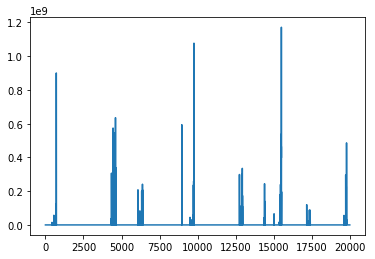

In [245]:
data['totals_transactionRevenue'].plot()

It can be seen above that for most customers the total transaction revenue is zero. Hence, the data is skewed / imbalanced.

Text(0.5,1,'Time Spent on Google Merchandise Store by Device')

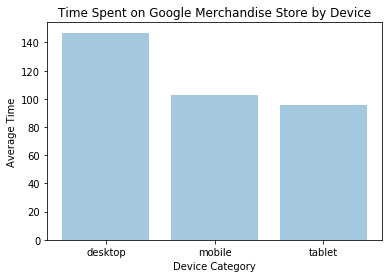

In [246]:
g = data.groupby('deviceCategory').mean()['totals_timeOnSite']
plt.bar(data['deviceCategory'].unique(),g,alpha = 0.4)
plt.xlabel('Device Category')
plt.ylabel('Average Time')
plt.title('Time Spent on Google Merchandise Store by Device')

Hence, it can be seen that users who use a Desktop on average spend much more time on the website than those who use mobiles and tablets.

8. Data Scaling

All numerical features of the dataset need to be scaled so that all features have the same weight when computing Euclidian distances.

In [247]:
data_forscaling = data[['visitNumber','totals_bounces','totals_hits','totals_newVisits','totals_pageviews','totals_sessionQualityDim','totals_timeOnSite','totals_totalTransactionRevenue','totals_transactionRevenue']]

I prefer the MinMaxScaler as all values for a feature are restricted to values between 0 and 1. This sort of a result is very easy to interpret.

In [248]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
data_scaled = sc.fit_transform(data_forscaling)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [249]:
data_scaleddf = pd.DataFrame(data_scaled)
data_scaleddf.head(3)

,0,1,2,3,4,5,6,7,8
0,0.0000,1.0,0.000000,1.0,0.006061,0.010417,0.000000,0.0,0.0
1,0.0125,0.0,0.004386,0.0,0.012121,0.020833,0.005042,0.0,0.0
2,0.0000,0.0,0.004386,1.0,0.012121,0.010417,0.006843,0.0,0.0


In [250]:
data_scaleddf.columns =['visitNumber','totals_bounces','totals_hits','totals_newVisits','totals_pageviews','totals_sessionQualityDim','totals_timeOnSite','totals_totalTransactionRevenue','totals_transactionRevenue']
data_scaleddf.head(3)

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue
0,0.0000,1.0,0.000000,1.0,0.006061,0.010417,0.000000,0.0,0.0
1,0.0125,0.0,0.004386,0.0,0.012121,0.020833,0.005042,0.0,0.0
2,0.0000,0.0,0.004386,1.0,0.012121,0.010417,0.006843,0.0,0.0


### Supervised Learning - Linear Regression

First I drop all numerical features from the original data and replace them with the scaled values

In [251]:
data_LReg = data.drop(['visitNumber','totals_bounces','totals_hits','totals_newVisits','totals_pageviews','totals_sessionQualityDim','totals_timeOnSite','totals_totalTransactionRevenue','totals_transactionRevenue','totals_visits','totals_transactions'], axis =1)
data_LReg = data_LReg.join(data_scaleddf)
data_LReg.head(3)

,channelGrouping,value,deviceCategory,isMobile,operatingSystem,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue
0,Organic Search,EMEA,desktop,False,Windows,0.0000,1.0,0.000000,1.0,0.006061,0.010417,0.000000,0.0,0.0
1,Referral,North America,desktop,False,Chrome OS,0.0125,0.0,0.004386,0.0,0.012121,0.020833,0.005042,0.0,0.0
2,Direct,North America,mobile,True,Android,0.0000,0.0,0.004386,1.0,0.012121,0.010417,0.006843,0.0,0.0


Create dummy variables for categorical features

In [252]:
dv1 = pd.get_dummies(data_LReg['channelGrouping'])
dv2 = pd.get_dummies(data_LReg['value'])
dv3 = pd.get_dummies(data_LReg['deviceCategory'])
dv4 = pd.get_dummies(data_LReg['isMobile'])
dv5 = pd.get_dummies(data_LReg['operatingSystem'])

For each of the dummy variables we need to set a baseline reference. I will consider the first dummy column of each variable as the baseline reference.

In [253]:
dv1 = dv1.iloc[:,1:]
dv2 = dv2.iloc[:,1:]
dv3 = dv3.iloc[:,1:]
dv4 = dv4.iloc[:,1:]
dv5 = dv5.iloc[:,1:]

Drop the categorical features from the main dataset and replace with binary encoded dummy variables

In [254]:
data_LReg = data_LReg.drop(['channelGrouping', 'value', 'deviceCategory', 'isMobile', 'operatingSystem'], axis = 1)
data_LReg = data_LReg.join(dv1)
data_LReg = data_LReg.join(dv2)
data_LReg = data_LReg.join(dv3)
data_LReg = data_LReg.join(dv4)
data_LReg = data_LReg.join(dv5)

In [255]:
data_LReg.head(3)

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,Direct,...,Macintosh,Nintendo Wii,OS/2,Playstation Vita,Samsung,Tizen,Windows,Windows Phone,Xbox,iOS
0,0.0000,1.0,0.000000,1.0,0.006061,0.010417,0.000000,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.0125,0.0,0.004386,0.0,0.012121,0.020833,0.005042,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0000,0.0,0.004386,1.0,0.012121,0.010417,0.006843,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


Set target and independent variables dataframe

In [256]:
y = data_LReg[['totals_transactionRevenue']]
X = data_LReg.drop(['totals_transactionRevenue','totals_totalTransactionRevenue'], axis = 1).values

Split data into training and test sets

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Call instance of model and fit it on training data

In [258]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Use the model to predict values for the test data

In [259]:
y_pred = regressor.predict(X_test)

Performance metrics of Linear Regression Model

In [260]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: {}".format(regressor.score(X_test, y_test)))

Mean Absolute Error: 0.0027625417936348396
Mean Squared Error: 0.0003037970145794748
Root Mean Squared Error: 0.01742977379599273
R^2: 0.10631405480011114


### Supervised Learning - Gaussian Naive Bayes Classifier

Since this model is a classifier, I will convert the target label values to 1 and 0.

In [261]:
y_GNB = data_LReg['totals_transactionRevenue'].apply(lambda x: 1 if x>0 else 0)

Split data into training and test sets

In [262]:
X_train_GNB, X_test_GNB, y_train_GNB, y_test_GNB = train_test_split(X, y_GNB, test_size = 0.3, random_state = 0)

Call an instance of the model and fit on training data

In [263]:
from sklearn.naive_bayes import GaussianNB
modelgnb = GaussianNB()     
modelgnb.fit(X_train_GNB, y_train_GNB)              

GaussianNB(priors=None, var_smoothing=1e-09)

Use the model to predict values for test data

In [264]:
y_modelgnb = modelgnb.predict(X_test_GNB)

Performance metrics of Gaussian NB model

In [265]:
from sklearn.metrics import accuracy_score
accuracy_score(y_modelgnb, y_test_GNB)

0.6778333333333333

Text(91.68,0.5,'predicted label')

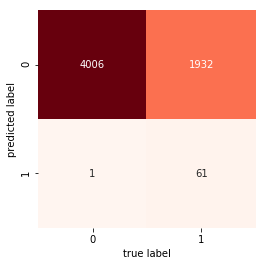

In [266]:
mat = confusion_matrix(y_modelgnb,y_test_GNB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            yticklabels=['0','1'],
            xticklabels=['0','1'], cmap = 'Reds')
plt.xlabel('true label')
plt.ylabel('predicted label')

### Unsupervised Learning (Clustering) - K Means Clustering

In K Means Clustering, the data records are clustered or grouped on the basis of similarity measured using Euclidian distances.

Call an instance of the model and fit it on data. Then determine cluster labels.

In [267]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
y_KM = kmeans.predict(X)

Determine cluster labels

In [268]:
y_KM_df = pd.DataFrame(y_KM)

In [269]:
y_KM_df[0].value_counts()

0    7893
2    6123
1    5984
Name: 0, dtype: int64

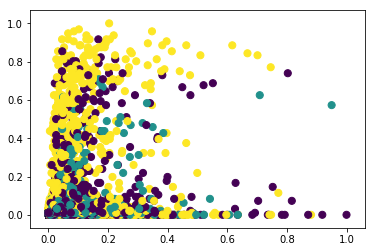

In [270]:
plt.scatter(X[:, 6], X[:, 5], c=y_KM, s=50, cmap='viridis')

### Unsupervised Learning (Clustering) - Gaussian Mixture Model

Call an instance of the model and fit it on data.

In [271]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)

Determine cluster labels

In [272]:
labels = gmm.predict(X)
pd.DataFrame(labels)[0].value_counts()

1    7653
2    6361
0    5986
Name: 0, dtype: int64

### Unsupervised Learning (Dimensionality Reduction) - PCA

Call an instance of the model and fit it on the data

In [273]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

I then find the optimal number of components that are needed to describe the data using an elbow curve.

Text(0,0.5,'cumulative explained variance')

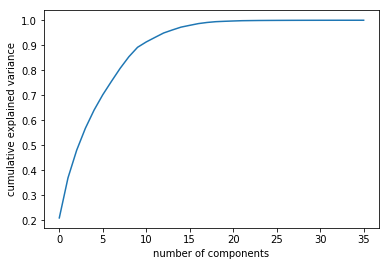

In [274]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Currently the independent features data has 36 components. This is a high number of dimensions because we cannot visualize beyond 3 dimensions. 

From the elbow curve, I can see that about 90% of the variance is explained by 10 components. 5 components on the other hand explain about 65% of the variance. So as the dimensionality is reduced, the explained variance decreases.

However, for the objective of visualization, I will select 2 components.

In [275]:
pca2 = PCA(n_components=2).fit(X)

In [276]:
print(pca2.components_)

[[-1.25654645e-03  4.22420901e-02 -2.92702812e-03  3.03515094e-02
  -3.00365797e-03 -7.80312595e-03 -4.70047892e-03  1.44342362e-02
   2.05440671e-02  1.63120022e-01  9.88764974e-03 -1.06743981e-01
  -8.86656211e-02  1.22697798e-02 -1.34379090e-03 -2.07609350e-02
   3.79634078e-02 -7.13692066e-03  5.33749013e-01  4.12299834e-02
   5.75097974e-01  3.21539182e-01  3.01897927e-04 -1.16411500e-02
   1.43594066e-04 -1.95973990e-02 -1.66490454e-01 -5.46439887e-05
  -7.36722977e-05  8.53255635e-05  6.29041327e-04  7.92243154e-04
  -3.76552558e-01  2.27275045e-03 -1.46744188e-04  2.40363628e-01]
 [ 3.80418441e-03 -3.66581079e-01  1.74539472e-02 -2.57340936e-01
   1.85222378e-02  3.22406373e-02  2.09592902e-02  5.31232421e-02
   8.38982315e-03 -1.39360252e-01  2.69976734e-02  2.38735280e-01
  -1.81538059e-01 -1.28490124e-01 -1.24334085e-02 -2.42553858e-01
   5.69326951e-01 -2.02430724e-02 -3.61438084e-02 -6.89654141e-03
  -4.29567993e-02 -4.48423366e-02 -9.77880950e-05  2.92324263e-02
  -5.1288

In [277]:
print(pca2.explained_variance_)

[0.59957784 0.45855484]


We can see that PCA has reduced dimensions as the number of features has reduced from 36 to 2.

In [278]:
X_pca = pca2.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (20000, 36)
transformed shape: (20000, 2)


In [280]:
pca2.explained_variance_ratio_

array([0.20938136, 0.16013406])

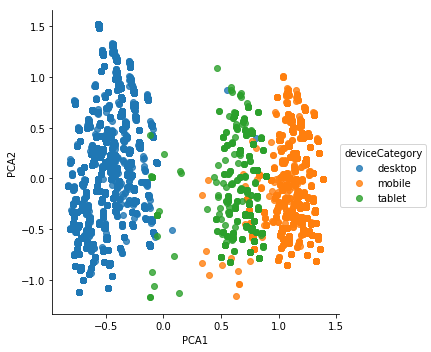

In [281]:
data_pca = data_copy2

data_pca['PCA1'] = X_pca[:, 0]
data_pca['PCA2'] = X_pca[:, 1]
sns.lmplot("PCA1", "PCA2", hue='deviceCategory', data=data_pca, fit_reg=False);

### Supervised Learning Model on Reduced Dataset - Linear regression + PCA

X_pca is the dataset that contains independent features that have been projected onto 2 dimensions.

y contains the target 

Split the data into training and test sets

In [282]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size = 0.3, random_state = 0)

Call an instance of regression model and fit on the data.

In [284]:
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Use the model to predict values for test data.

In [285]:
y_pred2 = regressor2.predict(X_test2)

Performance metrics of regression model

In [286]:
print('Mean Absolute Error:', mean_absolute_error(y_test2, y_pred2))  
print('Mean Squared Error:', mean_squared_error(y_test2, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, y_pred2)))
print("R^2: {}".format(regressor2.score(X_test2, y_test2)))

Mean Absolute Error: 0.002208952012734562
Mean Squared Error: 0.0003372707125424192
Root Mean Squared Error: 0.018364931596453585
R^2: 0.00784378693141996


I can see that the Mean Absolute error shows a marginal improvement compared to the previous scenario without PCA. Root Mean Squared Error and R^2 on the other hand are slightly lower than before. This slight decrease in performance is because the decrease in number of components through PCA is able to explain only a small part of the variance.

### Supervised Learning on Reduced Dataset - Gaussian NB Classifier + PCA

X_pca is the dataset that contains independent features that have been projected onto 2 dimensions.

y_pcagnb contains the target.

In [287]:
y_pcagnb = y_GNB

Split data into training and test sets

In [288]:
X_train_GNB2, X_test_GNB2, y_train_GNB2, y_test_GNB2 = train_test_split(X_pca, y_pcagnb, test_size = 0.3, random_state = 0)

Call an instance of the model and fit it on training data

In [289]:
from sklearn.naive_bayes import GaussianNB
modelgnb2 = GaussianNB()     
modelgnb2.fit(X_train_GNB2, y_train_GNB2) 

GaussianNB(priors=None, var_smoothing=1e-09)

Predict results on the test set

In [290]:
y_modelgnb2 = modelgnb2.predict(X_test_GNB2)

Check performance of the model

In [291]:
accuracy_score(y_modelgnb2, y_test_GNB2)

0.9896666666666667

Confusion Matrix to visualize performance

Text(91.68,0.5,'predicted label')

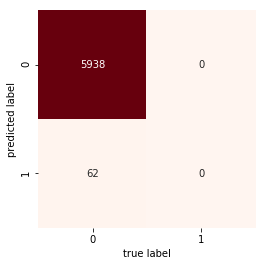

In [292]:
mat2 = confusion_matrix(y_modelgnb2,y_test_GNB2)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            yticklabels=['0','1'],
            xticklabels=['0','1'], cmap = 'Reds')
plt.xlabel('true label')
plt.ylabel('predicted label')

On the other hand, I can see that with PCA the classification model has shown a significant increase in performance. The accuracy increased from ~67% to ~98%. 